In [1]:
%run nb-env-daily.ipynb

[2021-10-19T22:18:58.686094+08:00] Enviroment loaded. Working Dir: /Users/tzhu/work/lab/neo_world/notebooks
Today is 2021-10-19, Working from 2020-09-24 to 2021-10-19
CPU times: user 1.72 s, sys: 1.73 s, total: 3.46 s
Wall time: 4.17 s


In [2]:
df = df_init.copy(deep=True)

In [4]:
from utils.psql_client import *
df = df.join(get_stock_basic(end_date)[['list_date']])

In [7]:
print(1)
sleep(5)
print(2)

1
2


In [9]:
def ak_all_plates():
    '''
    
    '''
    con_df = pd.DataFrame()
    cons = ak.stock_board_concept_name_ths()
    inds = ak.stock_board_industry_name_ths()
    plates = {
        'concept': cons,
        'industry': inds
    }
    sleep_counter = 0
    for k, plate in plates.items():
        for name in plate.name:
            tmp=ak.stock_board_concept_cons_ths(symbol=name)
            tmp1 = tmp.rename(columns={'代码':'ts_code'})[['ts_code']]
            tmp1.ts_code = tmp1.ts_code.apply(add_postfix)
            tmp1['plate_name'] = name
            tmp1['plate_type'] = k
            if len(con_df) == 0:
                con_df = tmp1
            else:
                con_df = con_df.append(tmp1)
            sleep_counter += 1
            if sleep_counter % 5 == 3:
                sleep(5)
    return con_df

In [13]:
con_df = ak_all_plates()

ValueError: No tables found

### OTher stuff

In [ ]:
def show_overview(df, date):
    tdf = df.xs(date, level='trade_date')
    print(f'Total Amount: {tdf.amount.sum()/100000}亿')
    =print(f'Median Pct: {round(t6)}')

In [78]:
len(today_cyb[today_cyb.pct_chg>0])

474

In [79]:
len(today_cyb[today_cyb.pct_chg<0])

345

In [82]:
today_cyb.amount.sum() / 100000

1452.12310512

In [84]:
len(cyb_stock_list)

842

In [13]:
# df.loc[:,'next_limit'] = df.groupby('ts_code').limit.shift(-1)
df.loc[:,'next_pct_chg'] = df.groupby('ts_code').pct_chg.shift(-1)

### 复盘
* [选股宝精选](https://xuangubao.cn/jingxuan): 大盘复盘，机构龙虎榜，游资龙虎榜
* [短线消息](https://www.aigupiao.com/news/igp_sina.php)：爱股票
* 行业回顾
* 概念回顾
* 强势股回顾

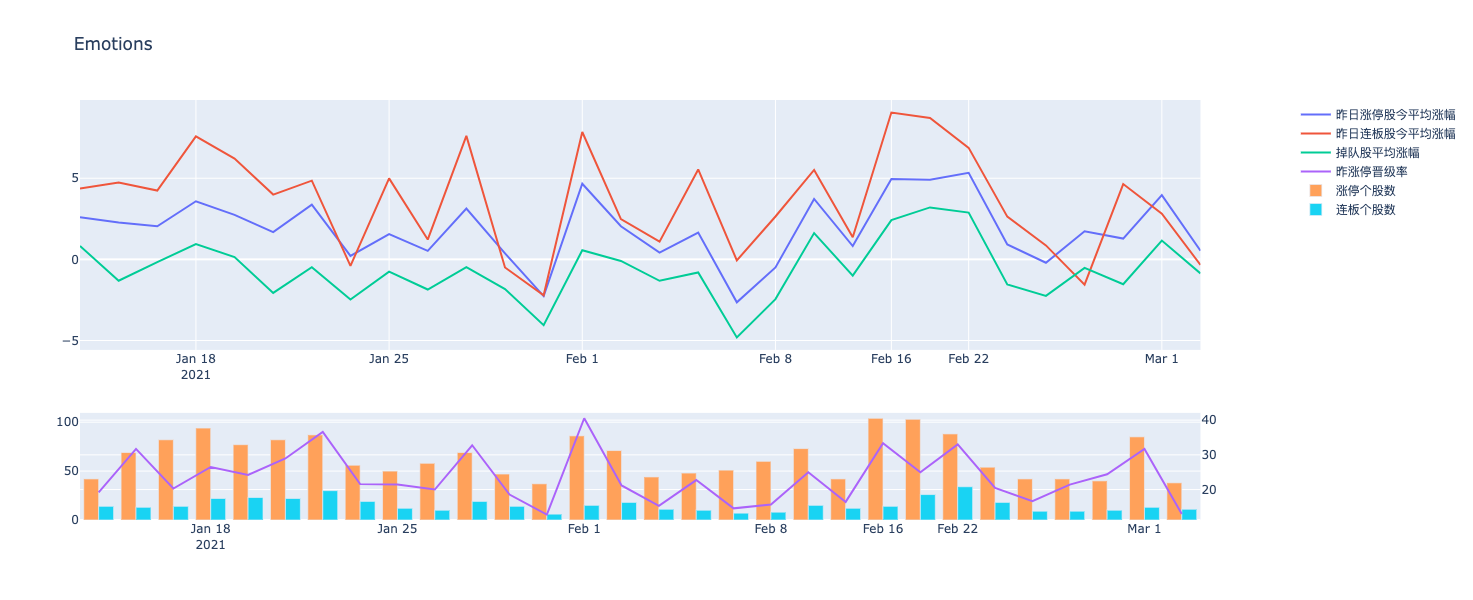

In [7]:
upstop_trend_df = upstop_trend(df, end_date, n_days=30)
plot_emo_trend(upstop_trend_df)

In [1]:
%%time

df = pd.read_feather(f'../tmp/df{end_date}.feather').set_index(['ts_code','trade_date'])
ind_df = pd.read_feather(f'../tmp/ind_df.feather').set_index(['ts_code','trade_date'])
df = df.join(ind_df)
dfzb = df.loc[hszb_stock_list]
dfcyb = df.loc[cyb_stock_list]
# df1 = calc_yinyang(df)
# df1.tail(5)

NameError: name 'pd' is not defined

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


### Scratch book

In [4]:
import plotly.graph_objects as go # or plotly.express as px
fig = go.Figure() # or any Plotly Express function e.g. px.bar(...)
# fig.add_trace( ... )
# fig.update_layout( ... )

import dash
import dash_core_components as dcc
import dash_html_components as html

app = dash.Dash()
app.layout = html.Div([
    dcc.Graph(figure=fig)
])

app.run_server(debug=True, use_reloader=False)  # Turn off reloader if inside Jupyter

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


In [23]:
byte_cnt = 64 * 2_000_000_000
gb_cnt = byte_cnt / 1024 / 1024 / 1024
gb_cnt

119.20928955078125

In [24]:
gb_cnt * 2 / 3

79.47285970052083

### 爬取选股宝

In [62]:
import pandas as pd
import requests as r
import json

In [53]:
# 涨停股池
res = r.get('https://flash-api.xuangubao.cn/api/pool/detail?pool_name=limit_up')
# superstock（强势股池）
res1 = r.get('https://flash-api.xuangubao.cn/api/pool/detail?pool_name=super_stock')

In [59]:
res_dict = json.loads(res.content)

In [ ]:
res_json
for x in res_dict['data']:
    

In [67]:
df1 = pd.DataFrame(res_dict['data'])

In [73]:
res_dict['data'][0]['limit_timeline']

{'items': [{'timestamp': 1610675352, 'status': 1}]}

In [74]:
res_dict['data'][0]['surge_reason']

{'symbol': '300885.SZ',
 'stock_reason': '公司预计年报净利润6100万元~6500万元，同比增长2.41%~9.13%；电动工具粉末冶金零件龙头，全球前十大电动工具厂商中有5家为公司主要客户，公司对行业第一史丹利百得的销售占比超50%\n',
 'related_plates': [{'plate_id': 17864537,
   'plate_name': '次新股',
   'plate_reason': '多股开板后跌超50%'}]}

In [90]:
df1.head(3)

,break_limit_down_times,break_limit_up_times,buy_lock_volume_ratio,change_percent,first_break_limit_down,first_break_limit_up,first_limit_down,first_limit_up,is_new_stock,issue_price,last_break_limit_down,last_break_limit_up,last_limit_down,last_limit_up,limit_down_days,limit_timeline,limit_up_days,listed_date,m_days_n_boards_boards,m_days_n_boards_days,mtm,nearly_new_acc_pcp,nearly_new_break_days,new_stock_acc_pcp,new_stock_break_limit_up,new_stock_limit_up_days,new_stock_limit_up_price_before_broken,non_restricted_capital,price,sell_lock_volume_ratio,stock_chi_name,stock_type,surge_reason,symbol,total_capital,turnover_ratio,volume_bias_ratio,yesterday_break_limit_up_times,yesterday_first_limit_up,yesterday_last_limit_up,yesterday_limit_down_days,yesterday_limit_up_days
0,0,0,0.052899,0.200136,0,0,0,1610675352,False,18.97,0,0,0,1610675352,0,"{'items': [{'timestamp': 1610675352, 'status':...",1,1599667200,0,0,0.0,0.0,0,0.861887,0,0,0.0,7.064000e+08,35.32,0,海昌新材,4,"{'symbol': '300885.SZ', 'stock_reason': '公司预计年...",300885.SZ,2.825600e+09,0.103221,1.158488,0,0,0,0,0
1,0,1,0.012957,0.099174,0,1610675763,0,1610673900,False,4.85,0,1610675763,0,1610675799,0,"{'items': [{'timestamp': 1610673900, 'status':...",1,911404800,0,0,0.0,0.0,0,0.096907,0,0,0.0,3.933142e+09,5.32,0,国风塑业,0,"{'symbol': '000859.SZ', 'stock_reason': '公司预计年...",000859.SZ,4.766594e+09,0.029415,3.079295,0,0,0,0,0
2,0,2,0.003923,0.051282,0,1610675562,0,1610675528,False,5.30,0,1610675809,0,1610675837,0,"{'items': [{'timestamp': 1610675528, 'status':...",1,948902400,0,0,0.0,0.0,0,-0.767925,0,0,0.0,1.147496e+09,1.23,0,*ST松江,1,"{'symbol': '600225.SS', 'stock_reason': '公司主营业...",600225.SS,1.150656e+09,0.003961,0.413525,0,0,0,0,0


In [91]:
plates = r.get('https://flash-api.xuangubao.cn/api/surge_stock/plates')
plates_dict = json.loads(plates.content)

In [92]:
print(len(plates_dict['data']['items']))
df2 = pd.DataFrame(plates_dict['data']['items'])
df2

61


,id,name,description
0,16847921,稀土磁材,工信部公开征求《稀土管理条例（征求意见稿）》意见
1,60429714,可降解塑料,多地“禁塑令”正式实施，可降解塑料供不应求
2,16846450,粘胶短纤,龙头中泰化学大幅上调年报业绩预期
3,24898553,ST股,年报摘帽预期；交易所发布退市新规
4,5433758,业绩预增,年报预告披露高峰期来临
5,25513273,军工,多只军工股年报业绩预告同比大增；新《军事装备条例》1日起正式施行
6,17864537,次新股,NaN
7,54856094,科创板,NaN
8,17032337,锂电池,NaN
9,25764977,新能源汽车,NaN


In [7]:
df = px.data.gapminder()
df

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716


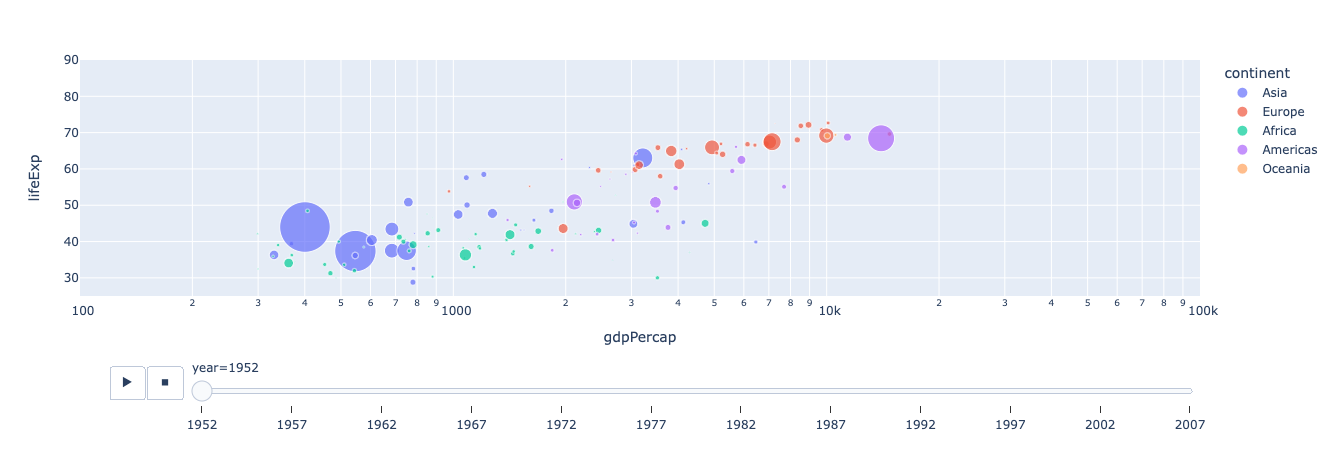

In [9]:
px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

In [8]:
px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

TypeError: line() got an unexpected keyword argument 'size_max'